## Heart Failure Prediction
#### Problem Statement:
Cardiovascular diseases (CVDs) are a major health concern globally, as they are the leading cause of death, accounting for approximately 17.9 million deaths per year, or 31% of all deaths. Heart failure is a common consequence of CVDs. Early detection and management are crucial for individuals with CVDs or who are at high risk due to factors such as hypertension, diabetes, or hyperlipidemia. We are addressing this problem by developing a machine learning model to aid in the early detection and management of CVDs. Our goal is to use artificial intelligence techniques to automate the process of identifying and addressing this significant health issue, allowing us to focus on other problems as well.

#### Our Goal:
Is to predict whether a patient is at risk for heart failure based on various characteristics. This is a binary classification problem with both numerical and categorical features.

#### Dataset Columns:
Age : age of the patient [years]<br>
Sex : sex of the patient [M: Male, F: Female]<br>
ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
RestingBP : resting blood pressure [mm Hg]<br>
Cholesterol : serum cholesterol [mm/dl]<br>
FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br>
RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br>
MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]<br>
ExerciseAngina : exercise-induced angina [Y: Yes, N: No]<br>
Oldpeak : oldpeak = ST [Numeric value measured in depression]<br>
ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br>
HeartDisease : output class [1: heart disease, 0: Normal]

In [2]:
# Importing Libraries.
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing,model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,plot_roc_curve
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,GridSearchCV,train_test_split
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Creating a DataFrame.
df = pd.read_csv('/Users/hajimeci/Desktop/Data Analysis/heart.csv')
df.head(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

### Exploratory Data Analysis (EDA)

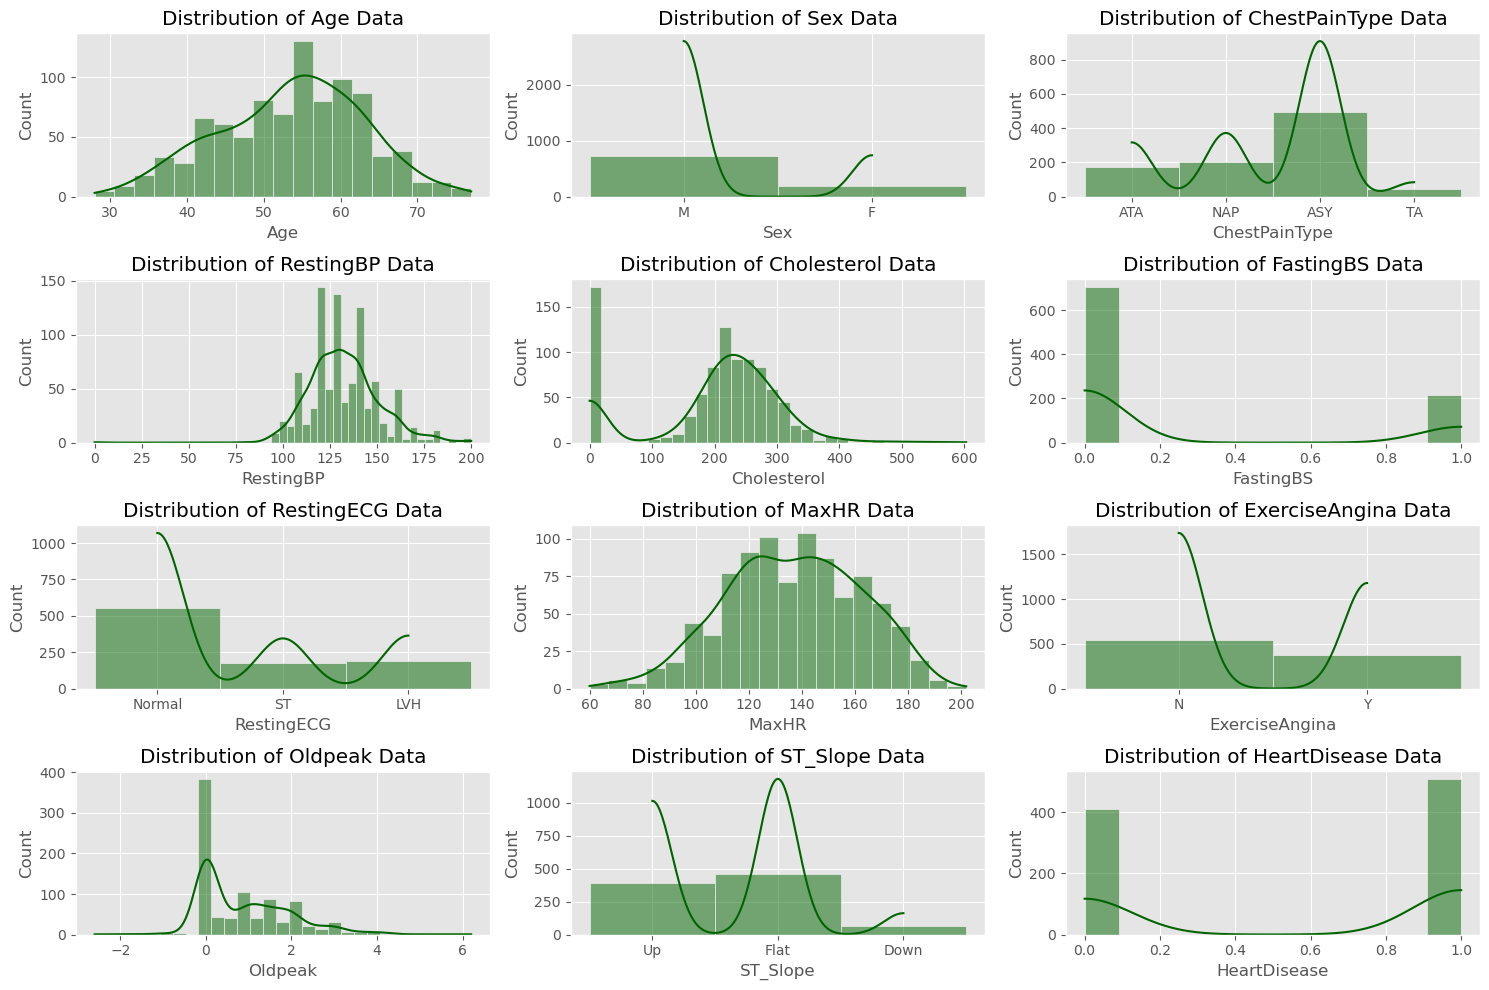

In [8]:
# Let's take a look to the distribution of the data.
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col], kde=True, color='darkgreen')
    plt.tight_layout()
    plt.plot()

Observations:
1. All the features, except for Cholesterol, are near about Normally Distributed.
2. Cholesterol data shows a bimodal distribution. However, 0 seems to be replacing null values.

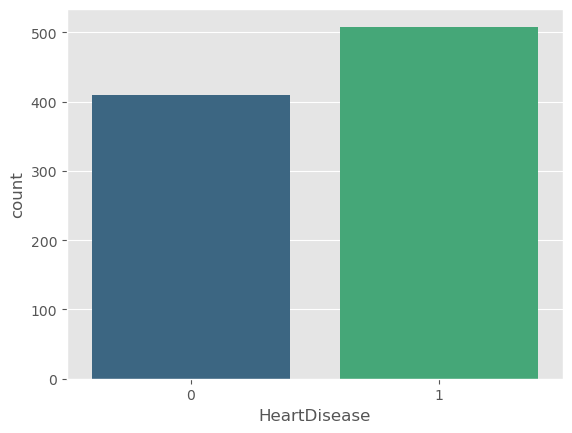

In [9]:
# Distribution of target variable.
sns.countplot(data=df, x='HeartDisease', palette='viridis')
plt.show()

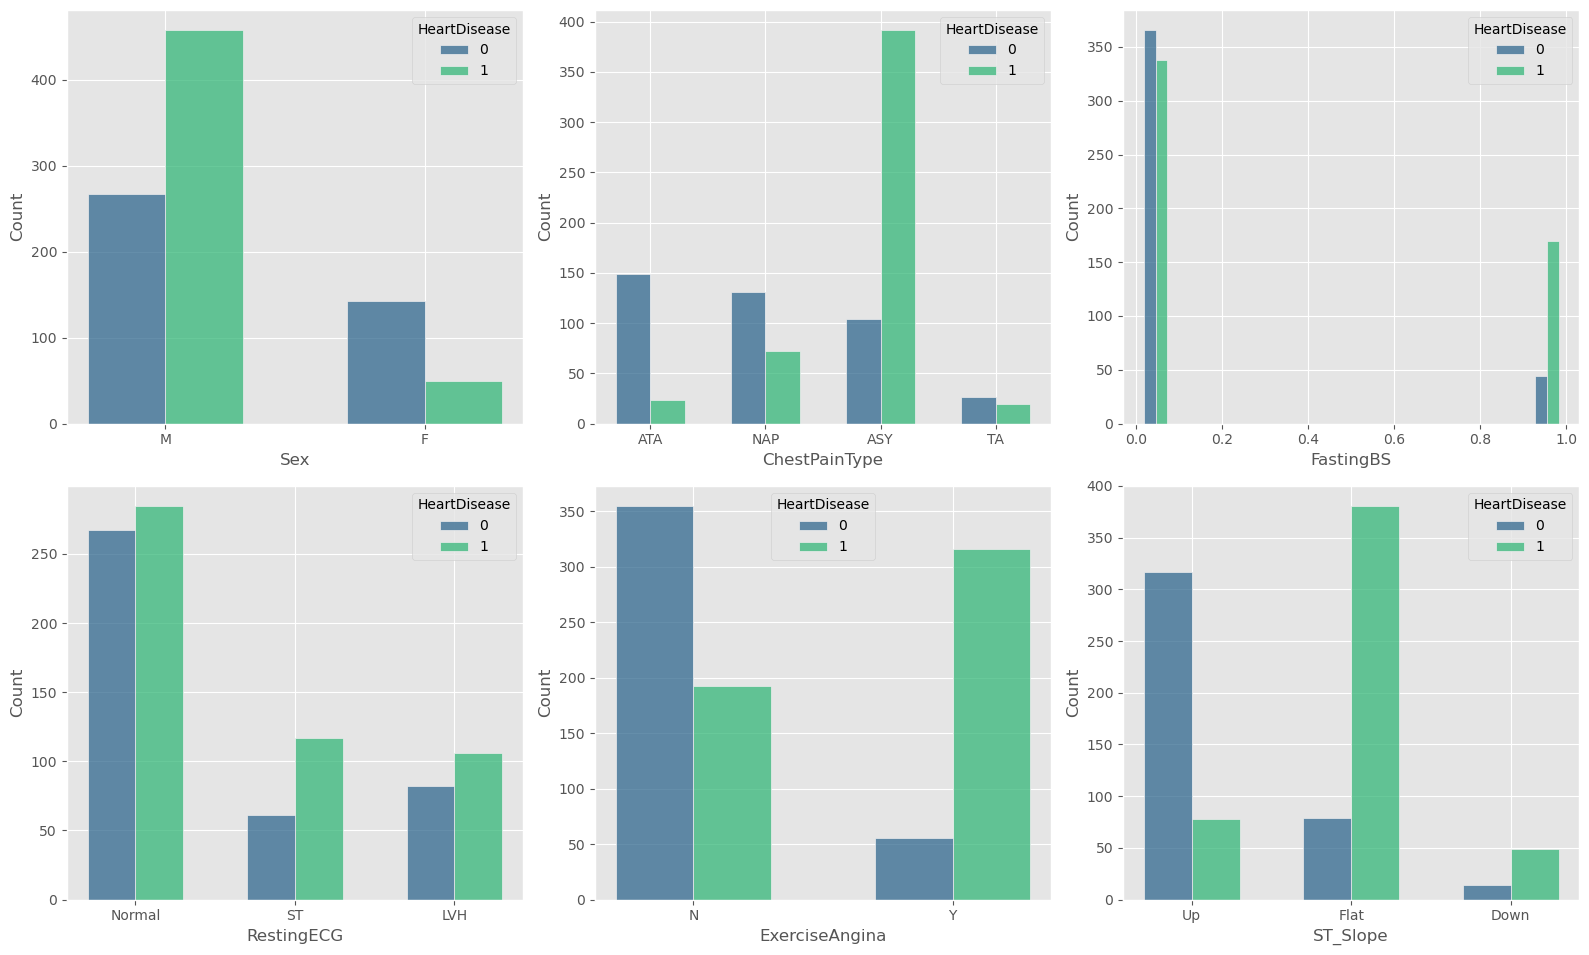

In [10]:
# Categorical Features vs. Heart Disease.
cat_feat = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
fig, axs = plt.subplots(2, 3, figsize=(16,10))

for i, ax in enumerate(axs.flat):
    sns.histplot(data=df, ax=ax, x=cat_feat[i], hue='HeartDisease', multiple='dodge', palette='viridis', shrink=.6)

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Observations:
1. The dataset is evenly balanced.
2. There are more men with heart disease than without heart disease. In contrast, there are fewer women with heart disease than without heart disease.
3. ASY type of chest pain shows a strong association with heart disease.
4. Fasting blood sugar levels can be difficult to interpret, as both patients with and without fasting blood sugar show a significant number of heart disease cases.
5. The resting ECG does not clearly show a pattern of heart disease among the three values.
6. Exercise-induced angina significantly increases the likelihood of a heart disease diagnosis.
7. Flat ST slope values show a high probability of heart disease, while down slope values show a lower, but still significant probability of heart disease.



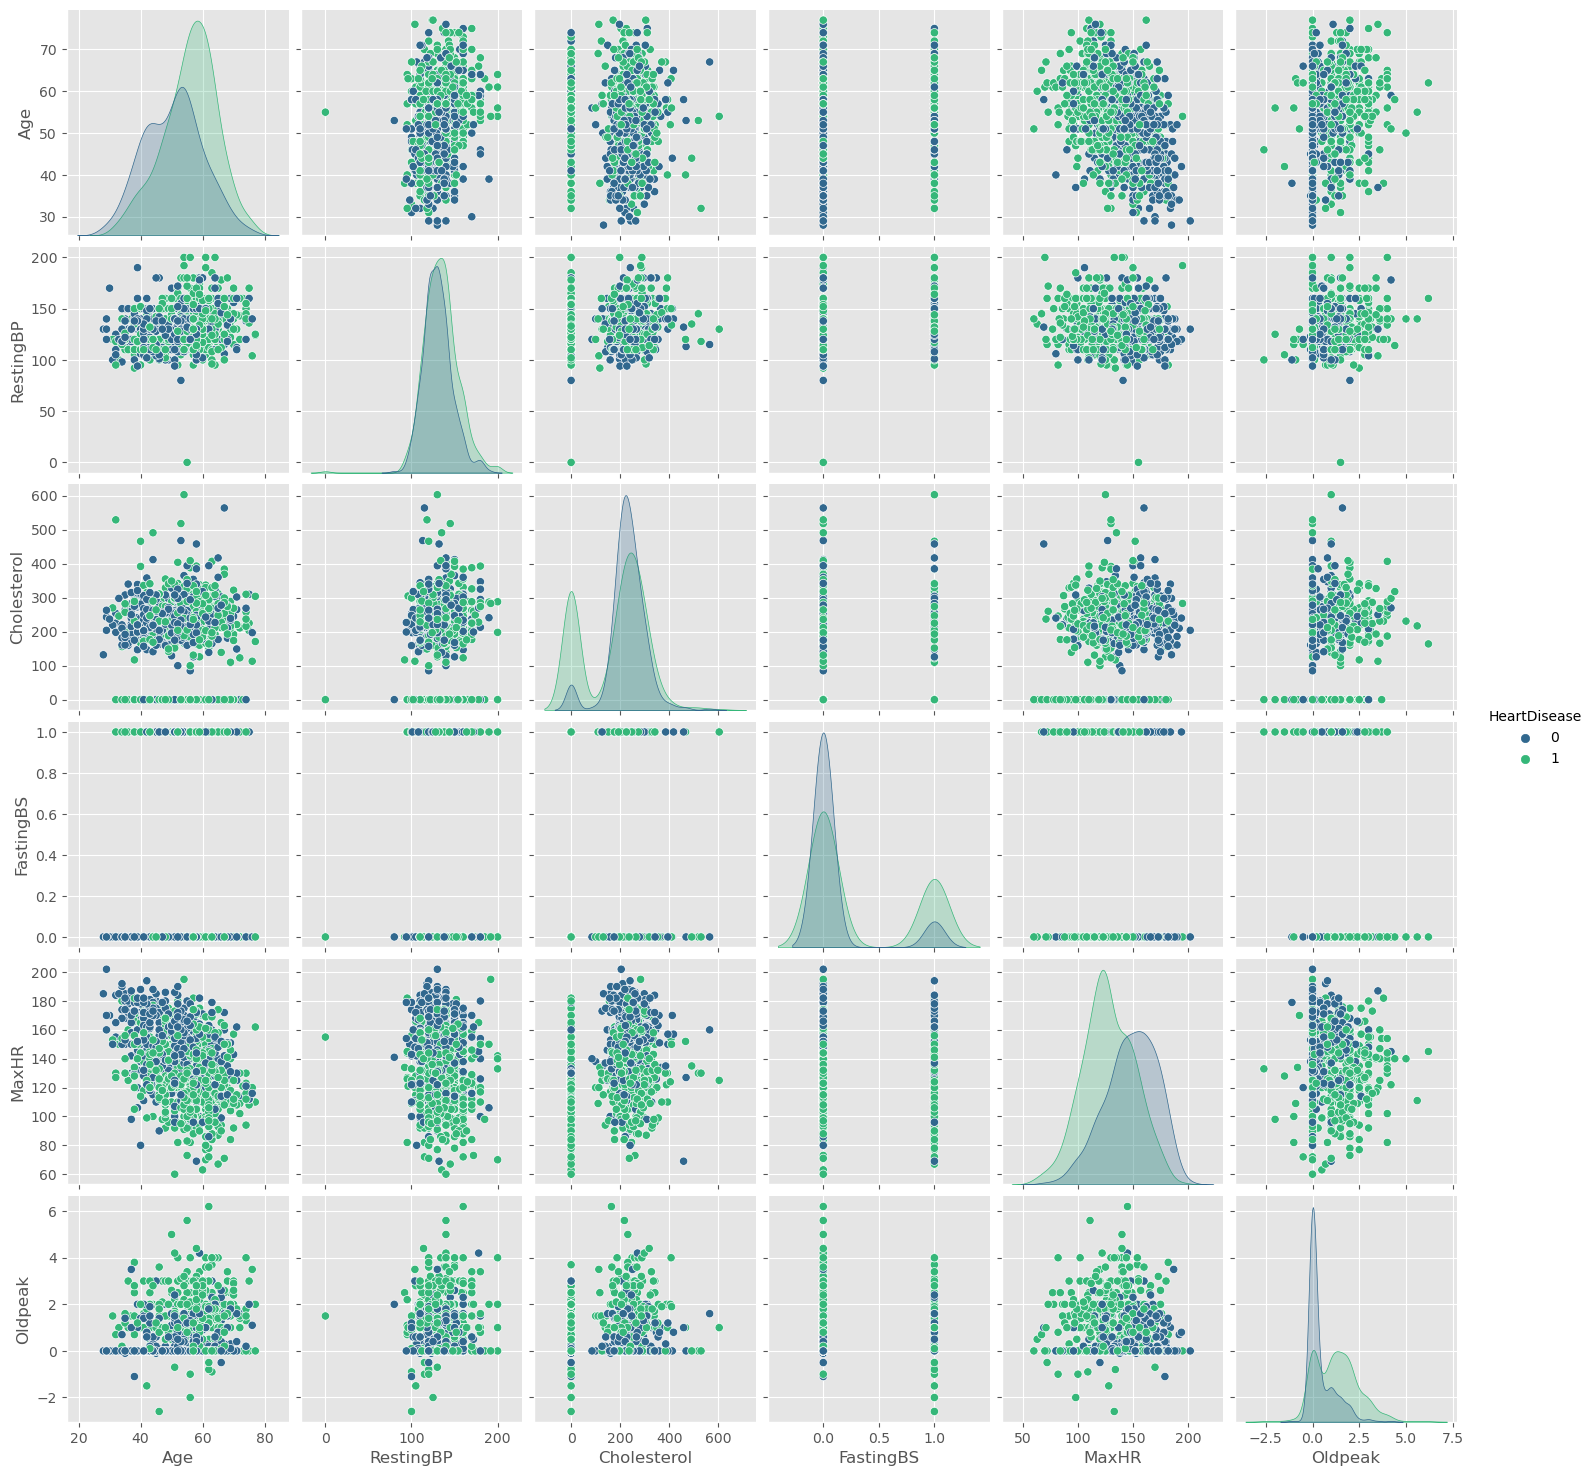

In [11]:
# Let's take a look to the relationship of the Numerical Features.
sns.pairplot(data=df, hue="HeartDisease", palette='viridis')
plt.show()

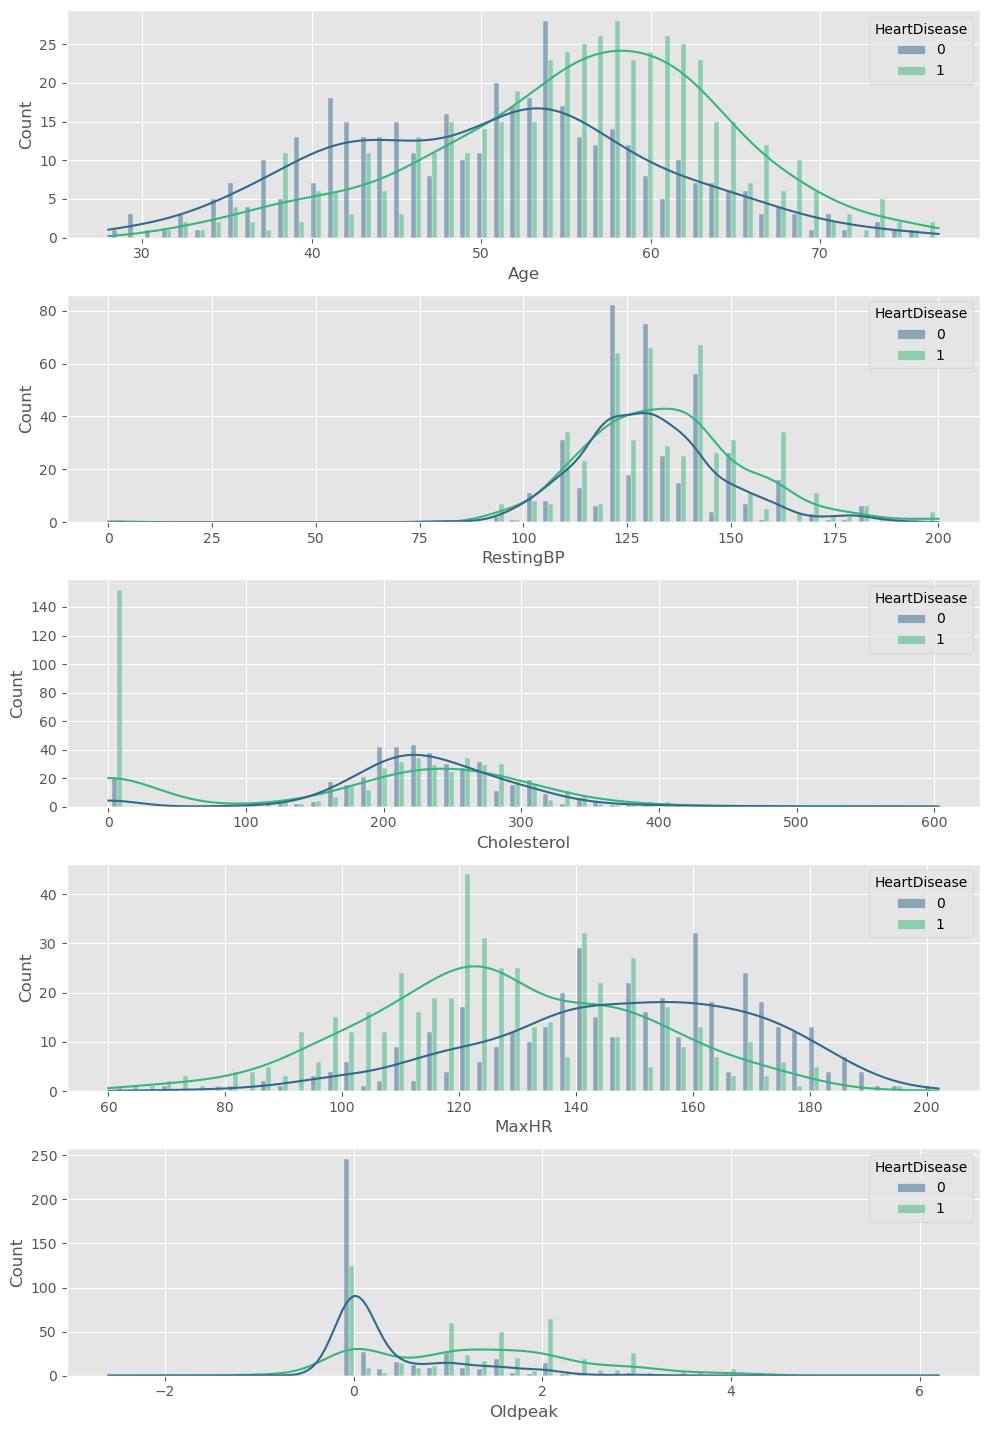

In [12]:
# Numerical Variables vs. Heart Disease.
num_feat = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axs = plt.subplots(5, 1, figsize=(10,15))

for i, ax in enumerate(axs.flat):
    sns.histplot(data=df, ax=ax, x=num_feat[i], hue='HeartDisease', multiple='dodge', palette='viridis', shrink=.6, kde=True, bins=50)

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

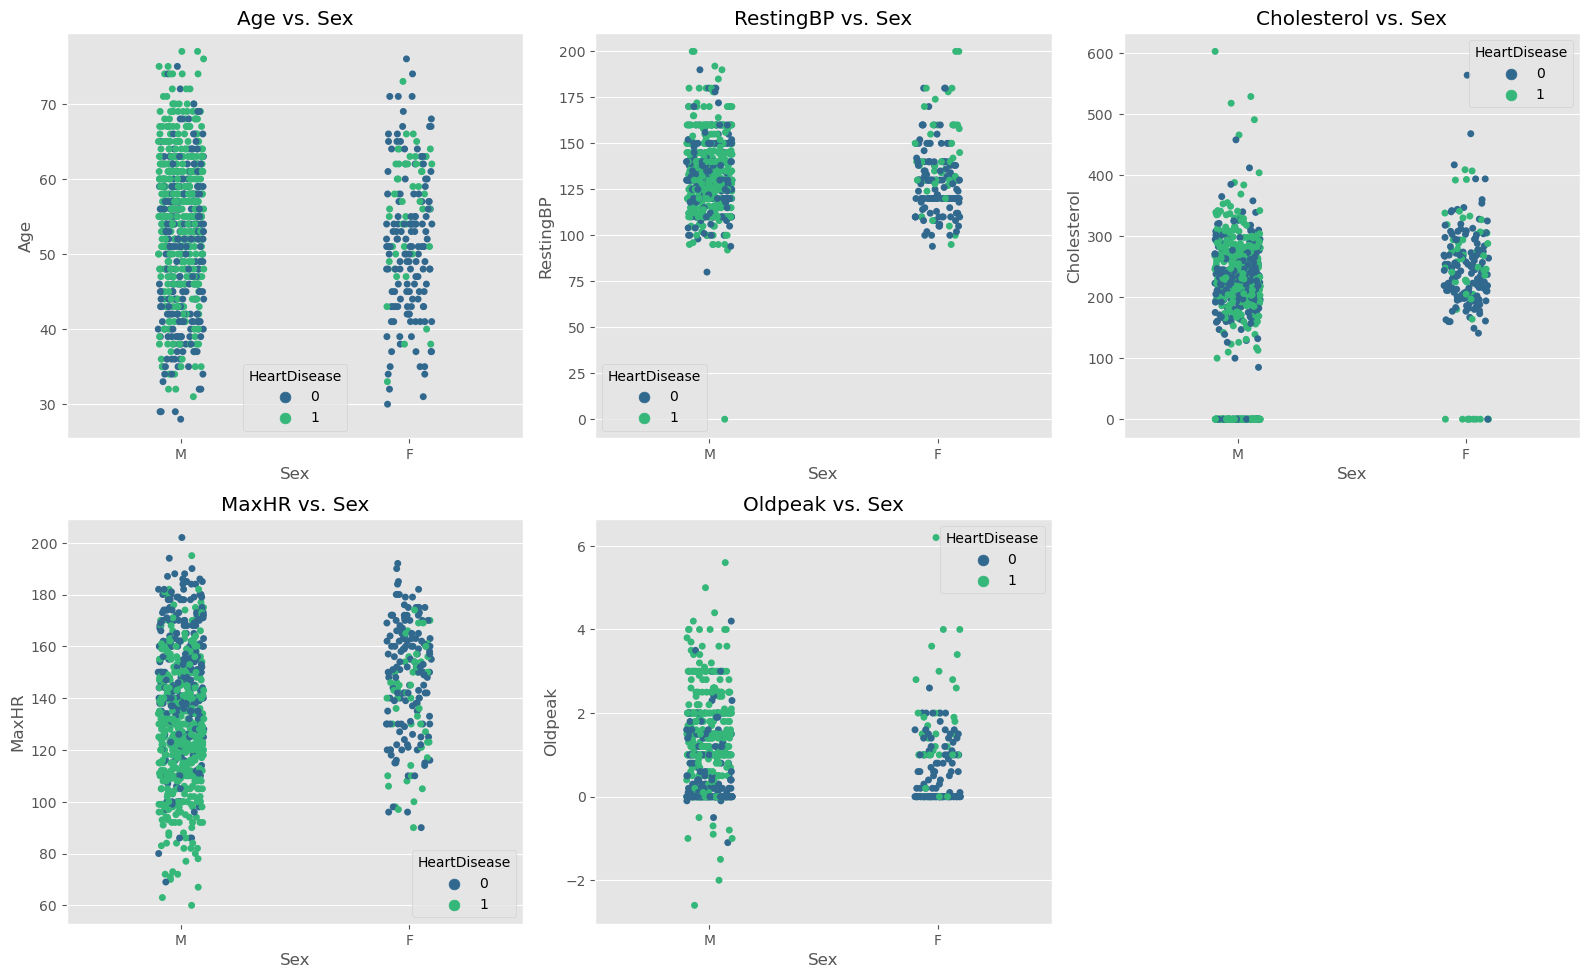

In [13]:
# Sex vs. Numerical Features in relation with Heart Disease.
fig, axs = plt.subplots(2, 3, figsize=(16,10))

for i in range(len(num_feat)):
    sns.stripplot(data=df, ax=axs.flat[i], x='Sex', y=num_feat[i], hue='HeartDisease', palette='viridis')
    axs.flat[i].set_title(num_feat[i] + ' vs. Sex')

axs.flat[-1].axis('off')
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

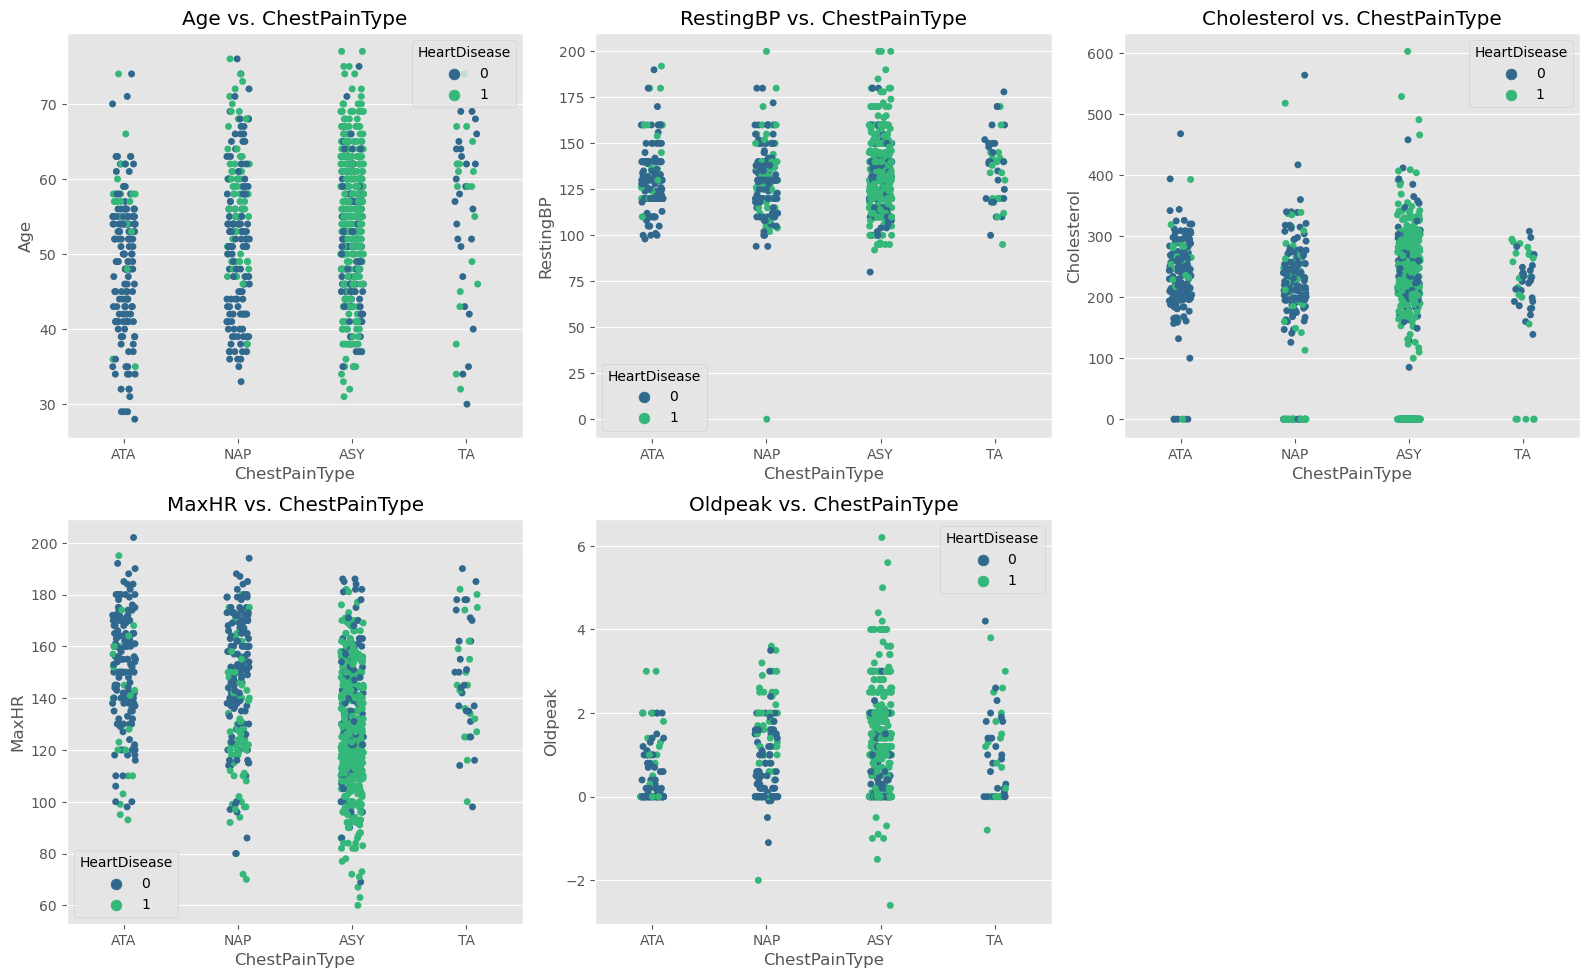

In [14]:
# ChestPainType vs. Numerical Features in relation with Heart Disease.
fig, axs = plt.subplots(2, 3, figsize=(16,10))

for i in range(len(num_feat)):
    sns.stripplot(data=df, ax=axs.flat[i], x='ChestPainType', y=num_feat[i], hue='HeartDisease', palette='viridis')
    axs.flat[i].set_title(num_feat[i] + ' vs. ChestPainType')

axs.flat[-1].axis('off')
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Observation: The ASY type of chest pain significantly outperforms other types of chest pain in all numerical features.

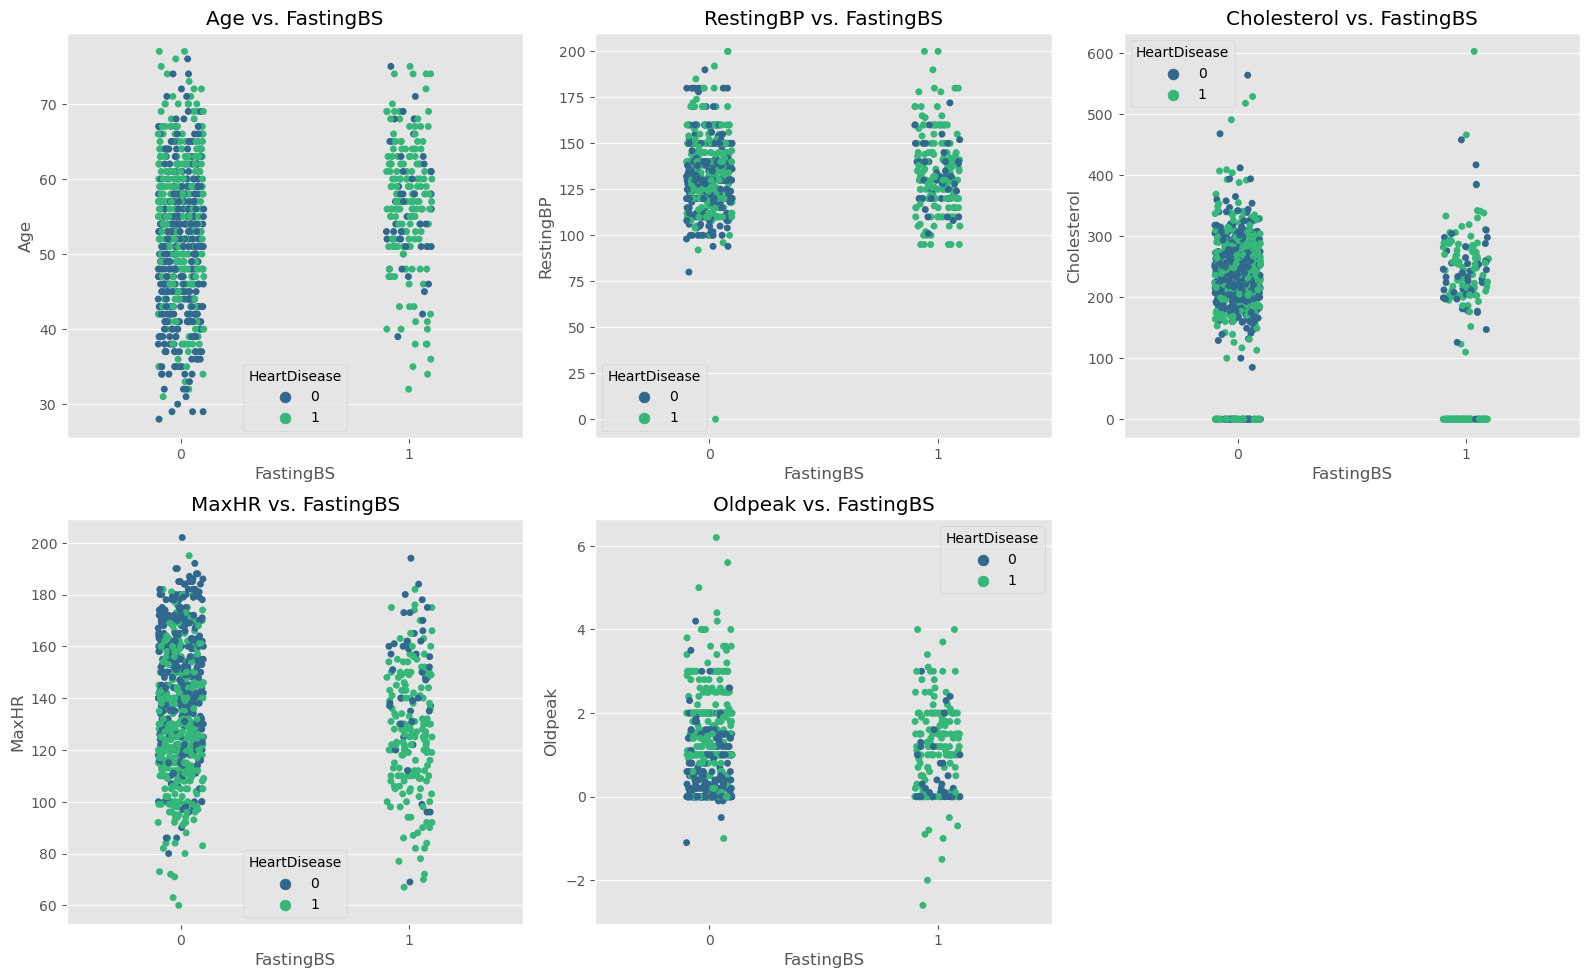

In [15]:
# FastingBS vs. Numerical Features in relation with Heart Disease.
fig, axs = plt.subplots(2, 3, figsize=(16,10))

for i in range(len(num_feat)):
    sns.stripplot(data=df, ax=axs.flat[i], x='FastingBS', y=num_feat[i], hue='HeartDisease', palette='viridis')
    axs.flat[i].set_title(num_feat[i] + ' vs. FastingBS')

axs.flat[-1].axis('off')
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Observations:
1. In the data, heart diseases are consistently present in patients over the age of 50, regardless of whether or not they have been diagnosed with fasting blood sugar.
2. The data shows that patients with fasting blood sugar and resting blood pressure over 100 have a higher incidence of heart disease than those without fasting blood sugar.
3. Cholesterol levels in combination with fasting blood sugar do not significantly influence the prevalence of heart disease.
4. The data indicates that patients who have not been diagnosed with fasting blood sugar but have a maximum heart rate below 130 are more likely to have heart disease.

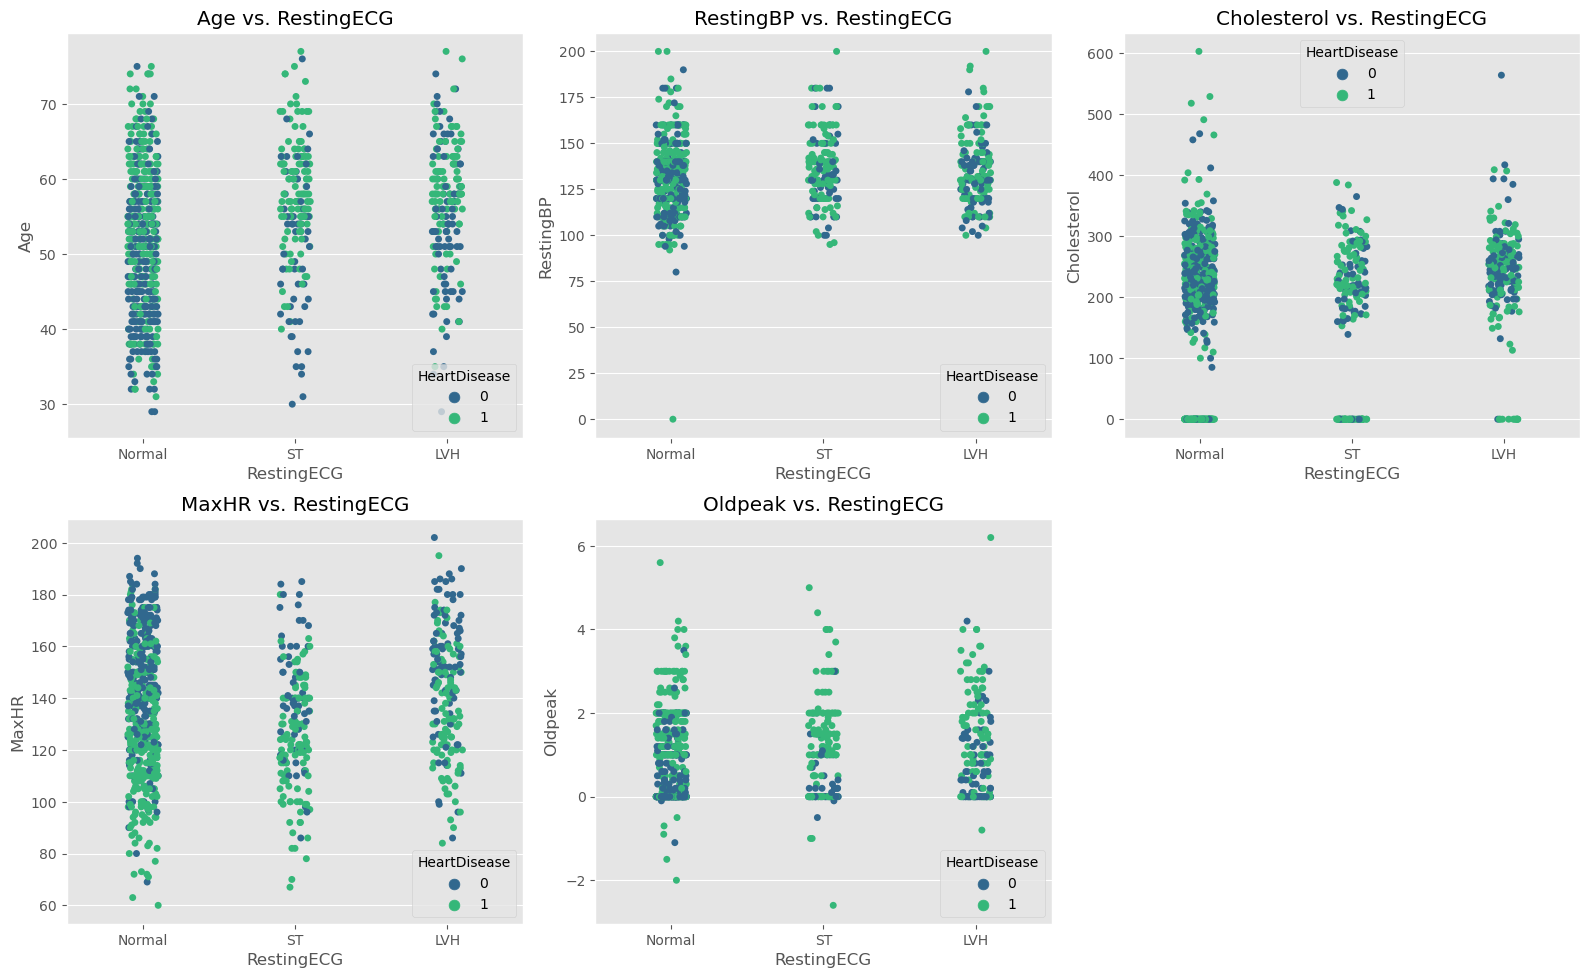

In [16]:
# RestingECG vs. Numerical Features in relation with Heart Disease.
fig, axs = plt.subplots(2, 3, figsize=(16,10))

for i in range(len(num_feat)):
    sns.stripplot(data=df, ax=axs.flat[i], x='RestingECG', y=num_feat[i], hue='HeartDisease', palette='viridis')
    axs.flat[i].set_title(num_feat[i] + ' vs. RestingECG')

axs.flat[-1].axis('off')
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Observations:
1. The data suggests that heart disease is detected in patients with RestingECG values of Normal, ST, and LVH starting at ages 30, 40, and 40, respectively. 
2. Heart disease is consistently present in patients over the age of 50, regardless of their RestingECG values. 
3. When cholesterol levels are between 200-300 and the RestingECG value is ST, there is a higher prevalence of heart disease. 
4. Heart disease is also more commonly found in patients with maximum heart rates below 140 and normal RestingECG values, as well as in patients with ST and LVH RestingECG values across all maximum heart rate values.

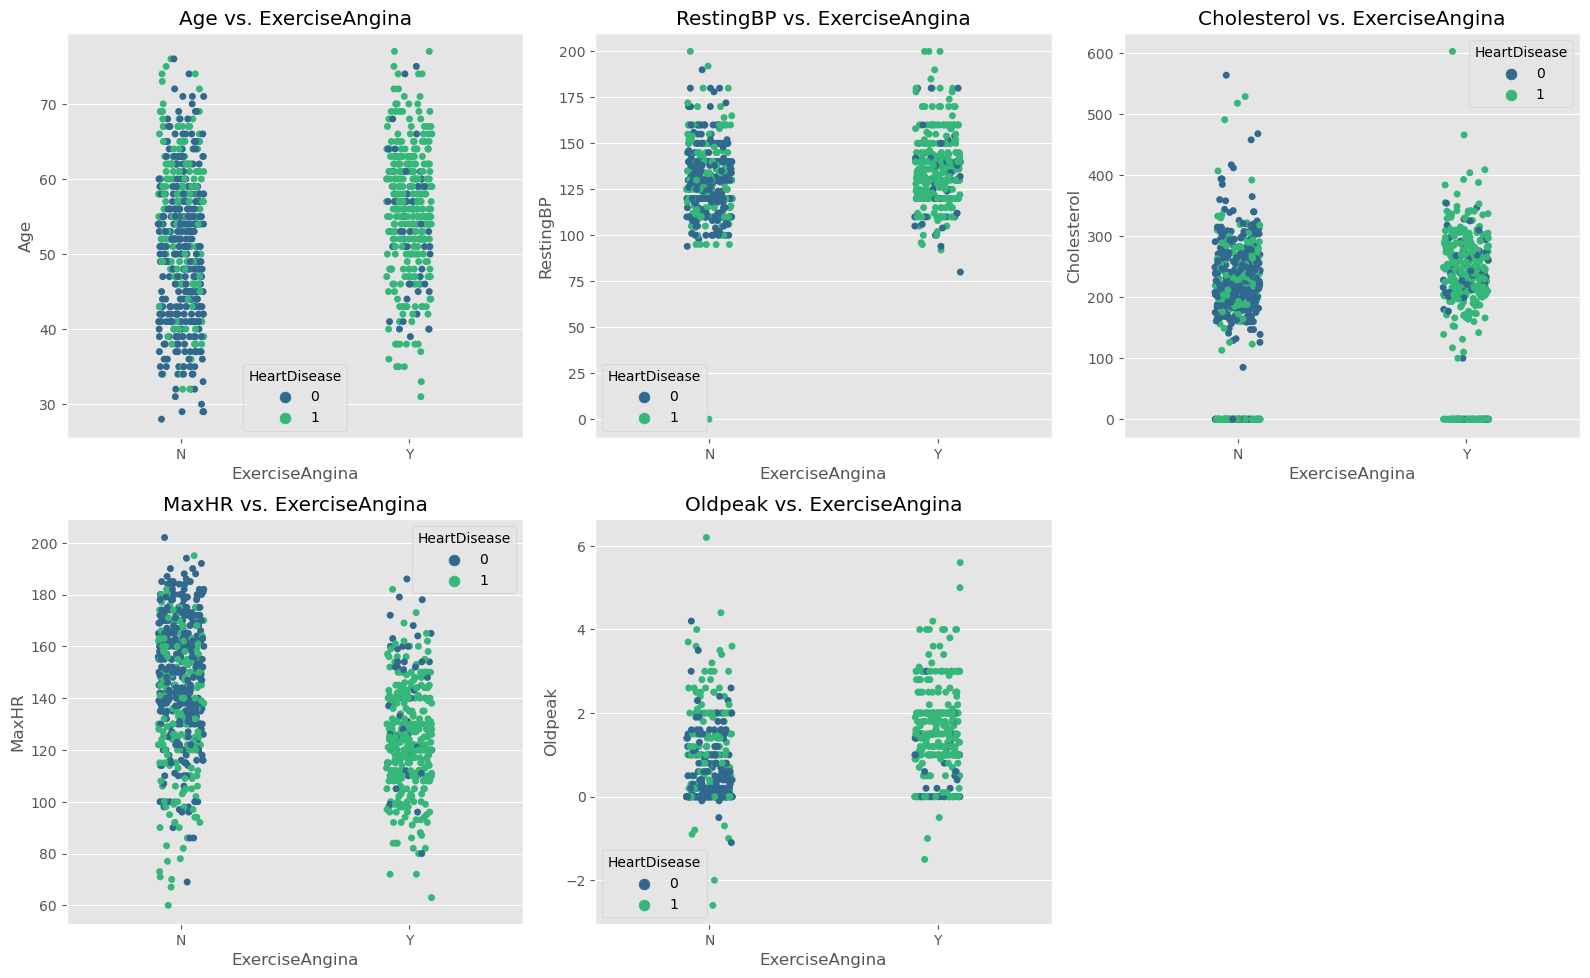

In [17]:
# ExerciseAngina vs. Numerical Features in relation with Heart Disease.
fig, axs = plt.subplots(2, 3, figsize=(16,10))

for i in range(len(num_feat)):
    sns.stripplot(data=df, ax=axs.flat[i], x='ExerciseAngina', y=num_feat[i], hue='HeartDisease', palette='viridis')
    axs.flat[i].set_title(num_feat[i] + ' vs. ExerciseAngina')

axs.flat[-1].axis('off')
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Observation: The data clearly demonstrates a positive correlation between the presence of heart disease and exercise-induced angina across all numerical features.

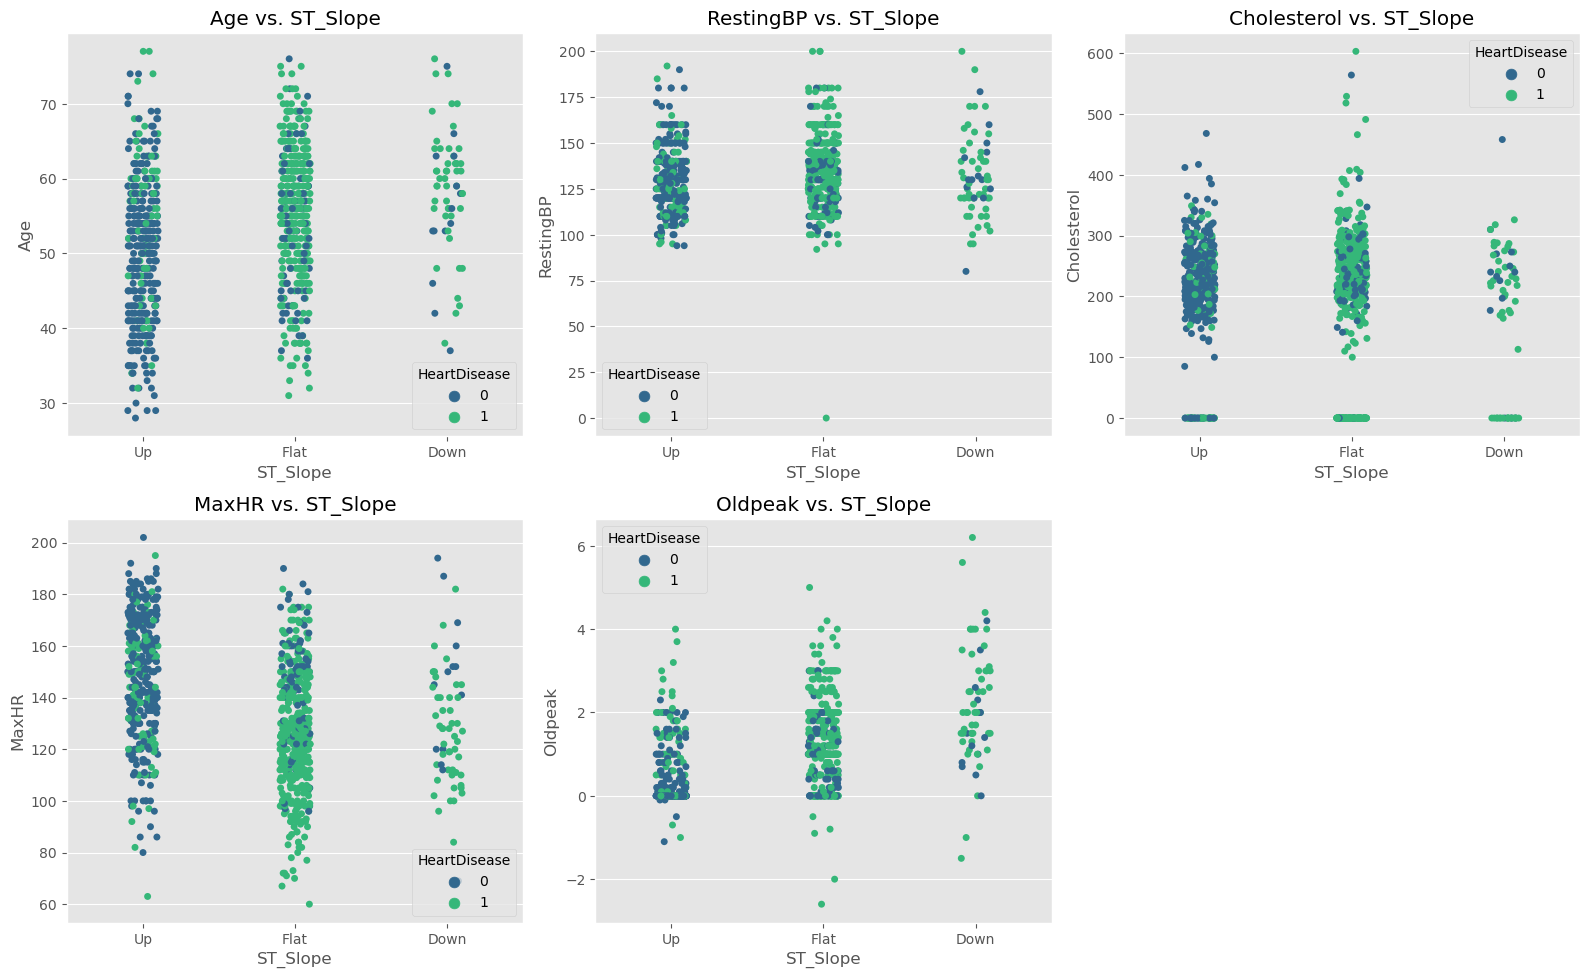

In [18]:
# ST_Slope vs. Numerical Features in relation with Heart Disease.
fig, axs = plt.subplots(2, 3, figsize=(16,10))

for i in range(len(num_feat)):
    sns.stripplot(data=df, ax=axs.flat[i], x='ST_Slope', y=num_feat[i], hue='HeartDisease', palette='viridis')
    axs.flat[i].set_title(num_feat[i] + ' vs. ST_Slope')

axs.flat[-1].axis('off')
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Observations:
1. There is a clear positive correlation between the ST_Slope value and the prevalence of heart disease.
2. Patients with flat ST_Slope values have the highest probability of being diagnosed with heart disease, followed by those with down ST_Slope values and then those with up ST_Slope values, who have the lowest probability.

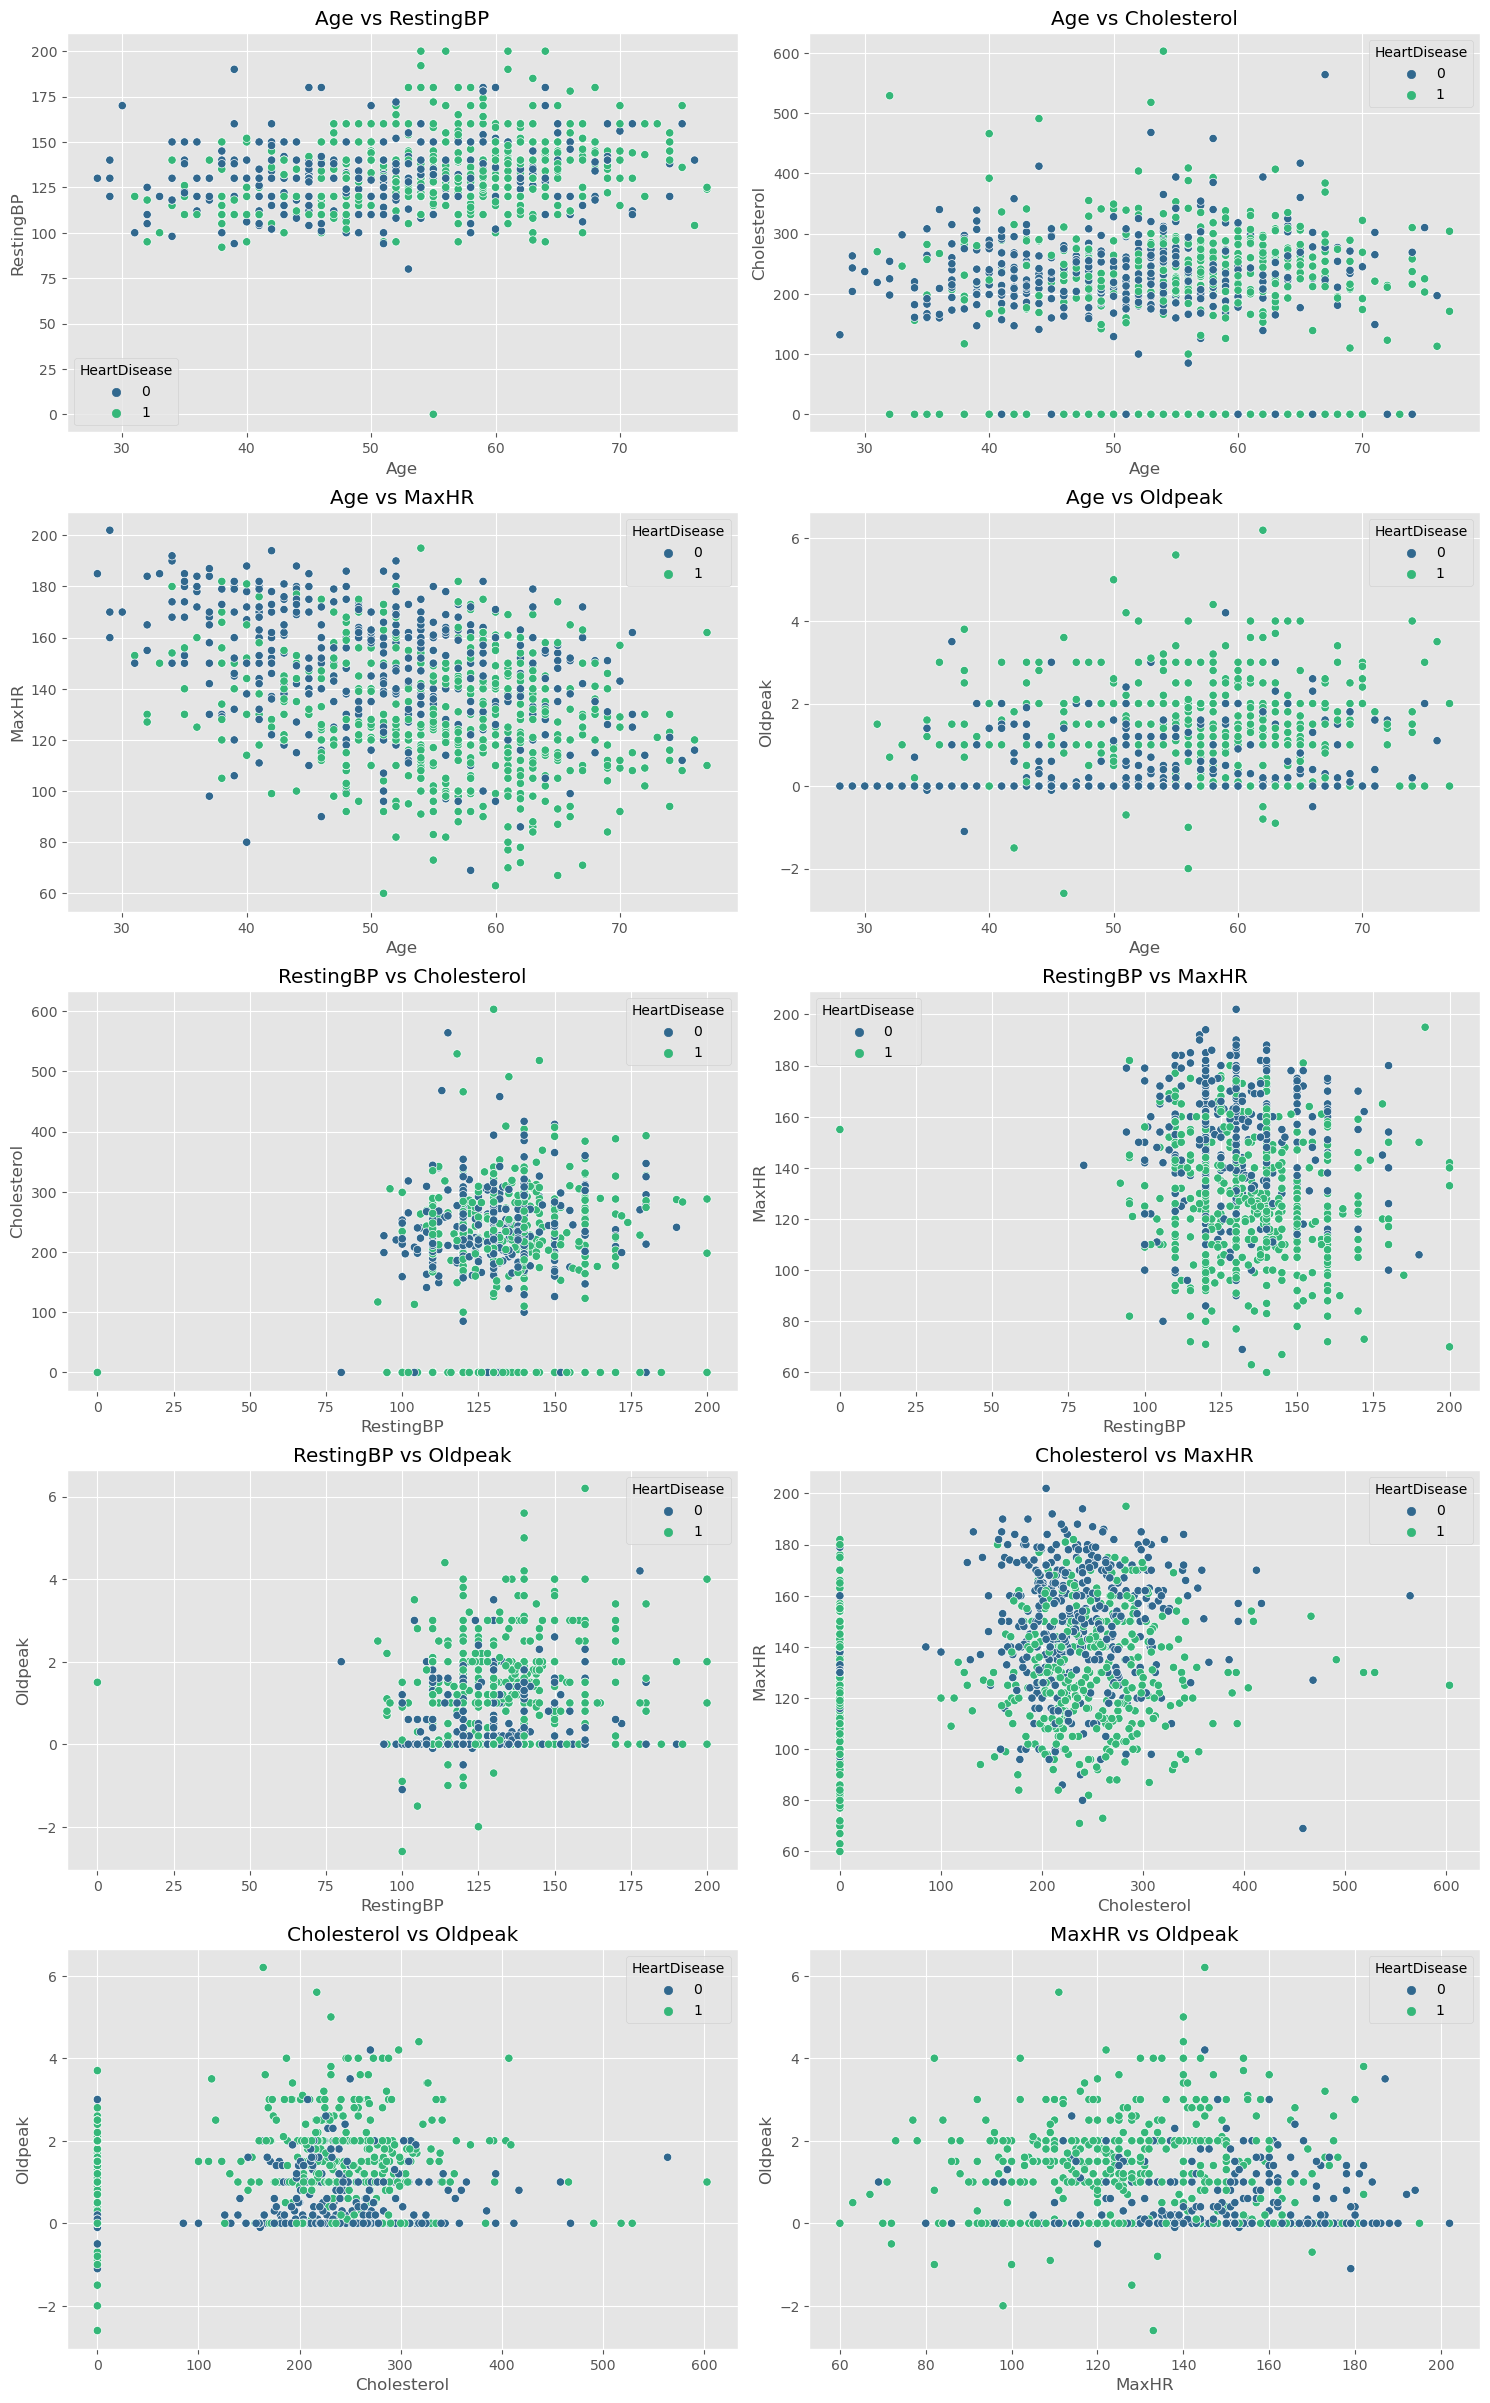

In [19]:
# Numerical Features vs. Numerical Features with relationship with Heart Disease.
a = 0
fig, axs = plt.subplots(5, 2 ,figsize = (15,25))
for i in range(len(num_feat)):
    for j in range(len(num_feat)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x=num_feat[i], y=num_feat[j], data=df, hue='HeartDisease', palette='viridis');
            title = num_feat[i] + ' vs ' + num_feat[j]
            plt.title(title)

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


Observations:
1. The data suggests that for patients over the age of 50, those with RestingBP values between 100-175, cholesterol levels between 200-300, MaxHR below 160, and positive Oldpeak values have a high probability of being diagnosed with heart disease. 
2. RestingBP values between 100-175 are consistently associated with a high prevalence of heart disease across all features. 
3. Cholesterol levels between 200-300 and maximum heart rates below 140 also have a high probability of being associated with heart disease.

### Feature Engineering

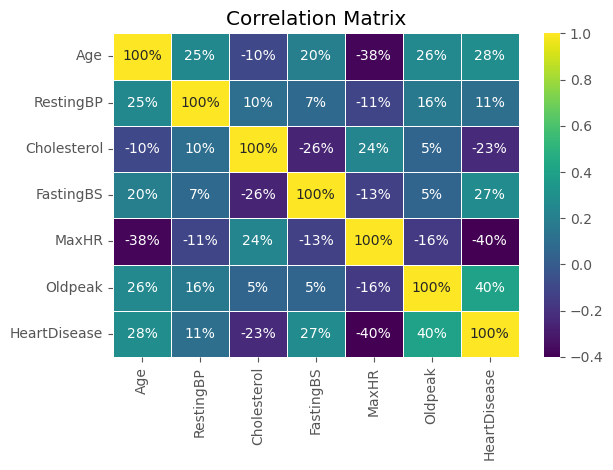

In [20]:
# Correlation Matrix
corr = df.corr()
fig, ax = plt.subplots()
sns.heatmap(data=corr, cmap='viridis', annot=True, fmt='.0%', linewidths=.5, ax=ax)

ax.set_title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [21]:
# Correlation to Heart Disease.
corrhd = df.corrwith(df['HeartDisease']).sort_values(ascending = False)
print(corrhd)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
dtype: float64


In [22]:
# Encoding Categorical Features.
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   12    1              1         41          147          0           1   
1   21    0              2         55           40          0           1   
2    9    1              1         31          141          0           2   
3   20    0              0         39           72          0           1   
4   26    1              2         49           53          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0     98               0       10         2             0  
1     82               0       20         1             1  
2     25               0       10         2             0  
3     34               1       25         1             1  
4     48               0       10         2             0

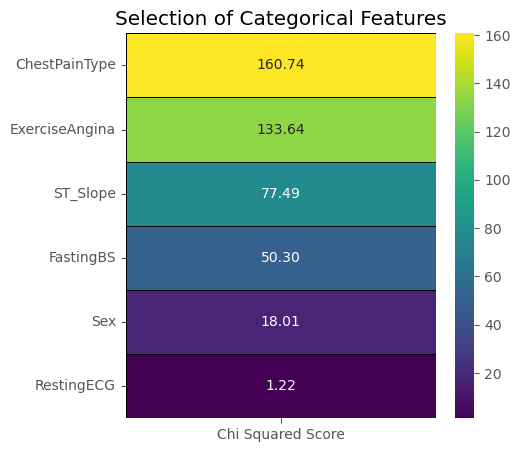

In [23]:
# Create the SelectKBest object and fit it to the data
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(df_tree[cat_feat], df_tree['HeartDisease'])

# Convert the scores to a dataframe and sort by the Chi Squared Score
featureScores = pd.DataFrame(data = fit.scores_,index = cat_feat,columns = ['Chi Squared Score']) 
featureScores = featureScores.sort_values(ascending=False, by='Chi Squared Score')

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores,annot = True,cmap = 'viridis',linewidths = 0.5, linecolor = 'black',fmt = '.2f')
plt.title('Selection of Categorical Features')
plt.show()

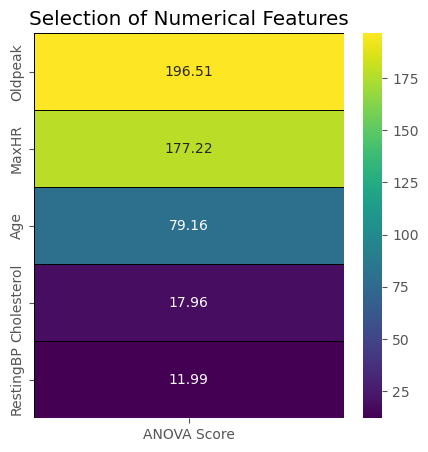

In [24]:
# Create the SelectKBest object and fit it to the data
best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(df_tree[num_feat], df_tree['HeartDisease'])

# Convert the scores to a dataframe and sort by the ANOVA Score.
featureScores = pd.DataFrame(data = fit.scores_,index = num_feat, columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features')
plt.show()

Observation: RestingECG and RestingBP are not very important for this prediction.

In [25]:
# Dropping RestingECG and RestingBP.
df_tree = df_tree.drop(columns=['RestingBP', 'RestingECG'], axis=1)
df_tree.head()

Age  Sex  ChestPainType  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   12    1              1          147          0     98               0   
1   21    0              2           40          0     82               0   
2    9    1              1          141          0     25               0   
3   20    0              0           72          0     34               1   
4   26    1              2           53          0     48               0   

   Oldpeak  ST_Slope  HeartDisease  
0       10         2             0  
1       20         1             1  
2       10         2             0  
3       25         1             1  
4       10         2             0

In [26]:
# Preparing features for non-tree based algorithms.
df_nontree = df.drop(columns=['RestingBP', 'RestingECG'], axis=1)

In [27]:
# Encoding Categorical Features for non-tree-based machine learning models.
cat_feat = ['Sex', 'ChestPainType', 'FastingBS', 'ExerciseAngina', 'ST_Slope']
df_nontree = pd.get_dummies(df_nontree, columns=cat_feat, drop_first=False)
df_nontree.head()

Age  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
0   40          289    172      0.0             0      0      1   
1   49          180    156      1.0             1      1      0   
2   37          283     98      0.0             0      0      1   
3   48          214    108      1.5             1      1      0   
4   54          195    122      0.0             0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  0                  1                  0                 0   
1                  0                  0                  1                 0   
2                  0                  1                  0                 0   
3                  1                  0                  0                 0   
4                  0                  0                  1                 0   

   FastingBS_0  FastingBS_1  ExerciseAngina_N  ExerciseAngina_Y  \
0            1            0                 1                 0   
1            1            0                 1                 0   
2            1            0                 1                 0   
3            1            0                 0                 1   
4            1            0                 1                 0   

   ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0              0              0            1  
1              0              1            0  
2              0              0            1  
3              0              1            0  
4              0              0            1

In [28]:
# Feature scaling for tree-based machine learning models. 
mms = MinMaxScaler() # Normalization (When data does not display Gaussian/Normal distribution)
ss = StandardScaler() # Standardization (When data displays Gaussian/Normal distribution)

df_nontree['Oldpeak'] = mms.fit_transform(df_nontree[['Oldpeak']])
df_nontree['Age'] = ss.fit_transform(df_nontree[['Age']])
df_nontree['Cholesterol'] = ss.fit_transform(df_nontree[['Cholesterol']])
df_nontree['MaxHR'] = ss.fit_transform(df_nontree[['MaxHR']])
df_nontree.head()

Age  Cholesterol     MaxHR   Oldpeak  HeartDisease  Sex_F  Sex_M  \
0 -1.433140     0.825070  1.382928  0.295455             0      0      1   
1 -0.478484    -0.171961  0.754157  0.409091             1      1      0   
2 -1.751359     0.770188 -1.525138  0.295455             0      0      1   
3 -0.584556     0.139040 -1.132156  0.465909             1      1      0   
4  0.051881    -0.034755 -0.581981  0.295455             0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  0                  1                  0                 0   
1                  0                  0                  1                 0   
2                  0                  1                  0                 0   
3                  1                  0                  0                 0   
4                  0                  0                  1                 0   

   FastingBS_0  FastingBS_1  ExerciseAngina_N  ExerciseAngina_Y  \
0            1            0                 1                 0   
1            1            0                 1                 0   
2            1            0                 1                 0   
3            1            0                 0                 1   
4            1            0                 1                 0   

   ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0              0              0            1  
1              0              1            0  
2              0              0            1  
3              0              1            0  
4              0              0            1

In [29]:
# Creating columns list for tree based model for future use.
tree_feat_col = df_tree.columns.to_list()
tree_feat_col.remove('HeartDisease')

# Creating columns list for non-tree based model for future use.
nontree_feat_col = df_nontree.columns.to_list()
nontree_feat_col.remove('HeartDisease')

# Defining Target Variable
target = 'HeartDisease'

### Data Modeling

I am going to start with Tree-based machine learning models.

In [30]:
X = df_tree[tree_feat_col]
y = df_tree[target].astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [32]:
def model(classifier):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, X_test,y_test, color='green')
    plt.title('ROC AUC Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,fmt ='', cmap='mako')
  
    # Classification Report
    print(classification_report(y_test,classifier.predict(X_test)))

#### Decision Tree Classifier

Accuracy :  83.70%
Cross Validation Score :  88.65%
ROC AUC Score :  83.50%


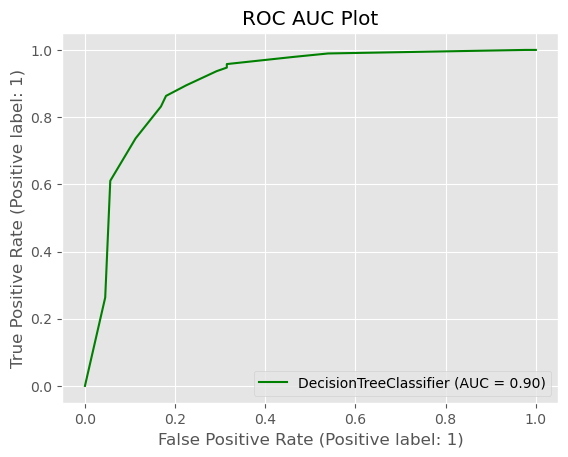

In [33]:
dtc = DecisionTreeClassifier(criterion="entropy",random_state = 1000,max_depth = 4,min_samples_leaf = 1)
model(dtc)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        89
           1       0.81      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



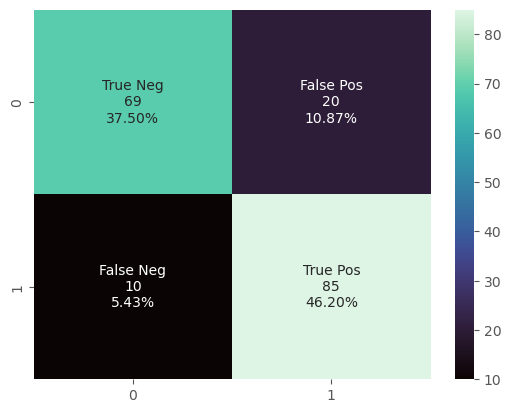

In [34]:
model_evaluation(dtc)

#### Random Forest Classifier

Accuracy :  84.24%
Cross Validation Score :  92.89%
ROC AUC Score :  84.06%


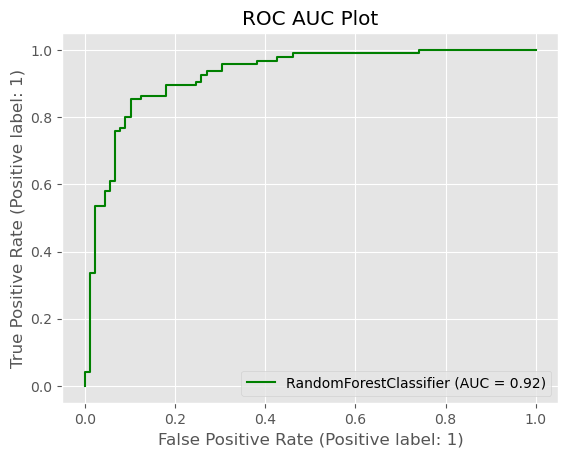

In [35]:
rfc = RandomForestClassifier(max_depth = 4,random_state = 0)
model(rfc)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



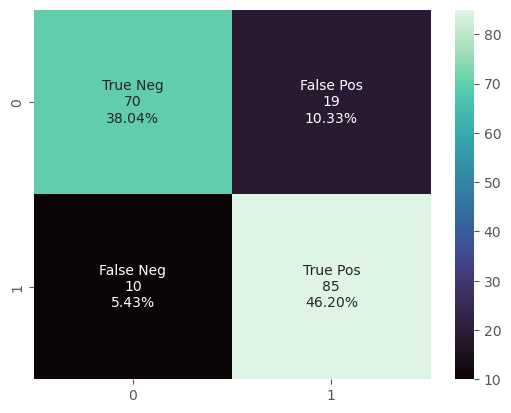

In [36]:
model_evaluation(rfc)

Let's try with non-tree based algorithms.

In [37]:
X = df_nontree[nontree_feat_col]
y = df_nontree[target].astype(int)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

#### Logistic Regression

Accuracy :  85.33%
Cross Validation Score :  92.68%
ROC AUC Score :  85.12%


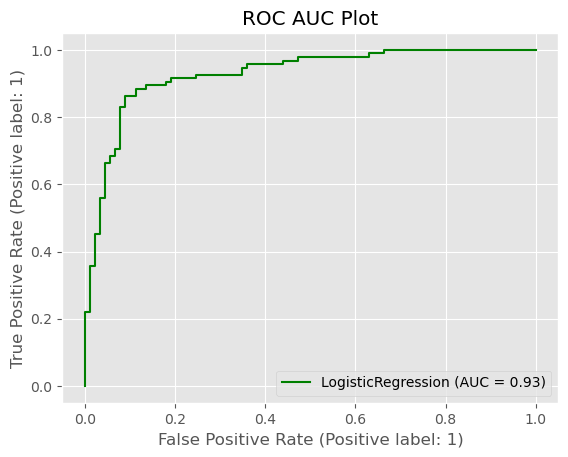

In [39]:
lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
model(lr)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        89
           1       0.82      0.92      0.87        95

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



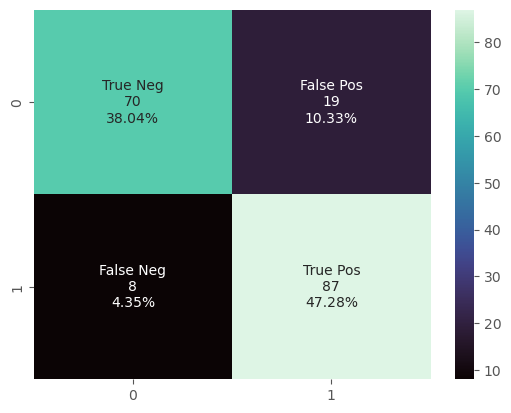

In [40]:
model_evaluation(lr)

#### Suport Vector Machine

Accuracy :  84.78%
Cross Validation Score :  92.01%
ROC AUC Score :  84.55%


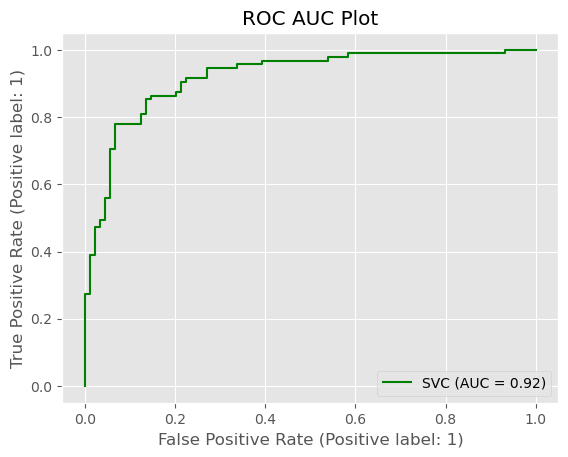

In [41]:
svc = SVC(kernel = 'rbf',C = 0.1)
model(svc)

              precision    recall  f1-score   support

           0       0.90      0.78      0.83        89
           1       0.81      0.92      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



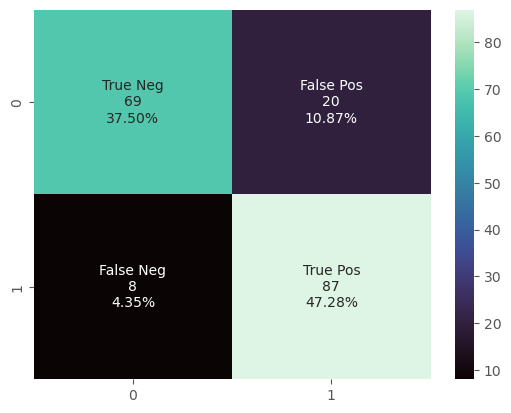

In [42]:
model_evaluation(svc)

#### Naive Bayers

Accuracy :  85.87%
Cross Validation Score :  92.08%
ROC AUC Score :  85.82%


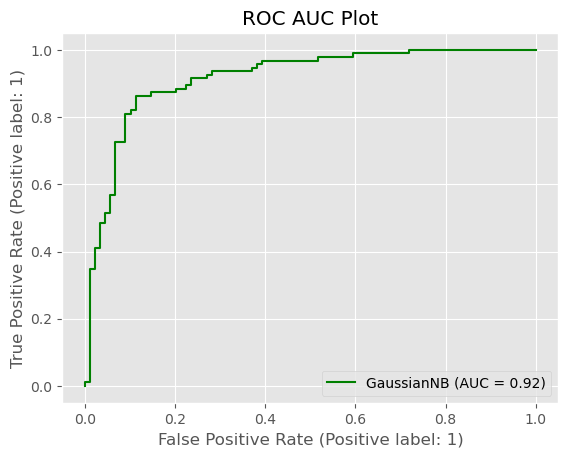

In [43]:
gau = GaussianNB()
model(gau)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        89
           1       0.86      0.87      0.86        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



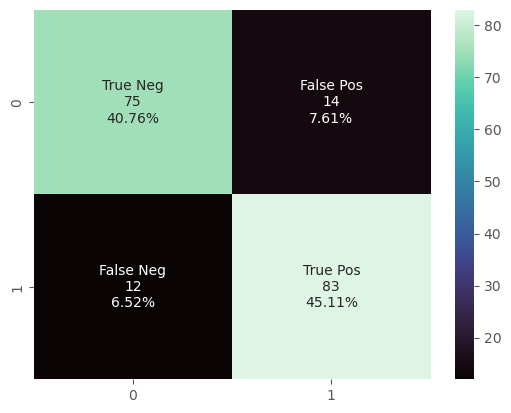

In [44]:
model_evaluation(gau)

#### K-Neighbors Classifier

Accuracy :  87.50%
Cross Validation Score :  92.60%
ROC AUC Score :  87.40%


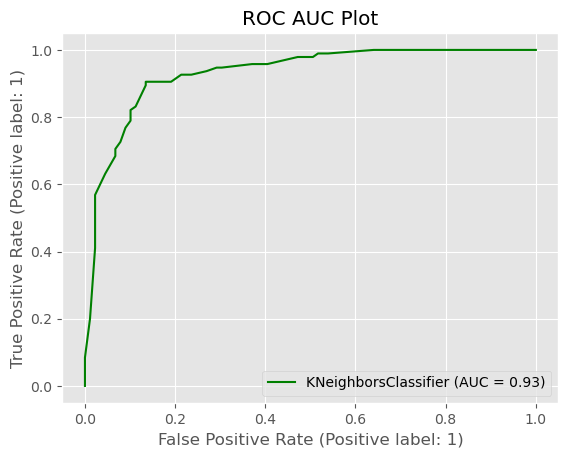

In [45]:
knei = KNeighborsClassifier(n_neighbors=32)
model(knei)

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        89
           1       0.86      0.91      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



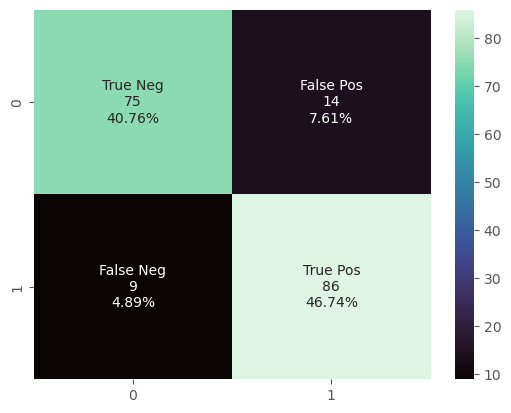

In [46]:
model_evaluation(knei)

I am grateful for your time spent reviewing my project. If you have any thoughts on how it could be improved, please don't hesitate to reach out to me or leave a comment. I value your feedback.

